Ridge Regression 

In [4]:
from sklearn.datasets import load_digits
import numpy as np
import seaborn as sns
import pandas as pd

In [5]:
data__load = load_digits()

data__load

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [6]:
csv_Data = pd.DataFrame(data__load.data)

In [7]:
csv_Data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [8]:
csv_Data.columns = data__load.feature_names
csv_Data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
x = data__load.data
y = data__load.target

In [10]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [11]:
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [13]:
X_train

array([[ 0.,  0.,  0., ..., 13.,  0.,  0.],
       [ 0.,  0.,  1., ...,  7.,  0.,  0.],
       [ 0.,  1., 12., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]], shape=(1203, 64))

In [14]:
y_train

array([1, 1, 8, ..., 2, 7, 1], shape=(1203,))

In [15]:
#Standardization 

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

standard

StandardScaler()

In [16]:
standard.fit_transform(X_train , y_train)

array([[ 0.        , -0.35276262, -1.07887239, ...,  1.06058522,
        -0.505317  , -0.19535349],
       [ 0.        , -0.35276262, -0.87246598, ...,  0.03591595,
        -0.505317  , -0.19535349],
       [ 0.        ,  0.72432731,  1.39800449, ..., -1.15953153,
        -0.505317  , -0.19535349],
       ...,
       [ 0.        , -0.35276262,  0.77878527, ...,  1.57291985,
        -0.02285958, -0.19535349],
       [ 0.        , -0.35276262, -0.87246598, ..., -1.15953153,
        -0.505317  , -0.19535349],
       [ 0.        , -0.35276262, -0.87246598, ..., -0.98875332,
        -0.505317  , -0.19535349]], shape=(1203, 64))

In [17]:
standard.transform(X_test)

array([[ 0.        , -0.35276262, -1.07887239, ...,  1.23136343,
         0.70082655, -0.19535349],
       [ 0.        , -0.35276262,  1.19159808, ..., -0.98875332,
        -0.505317  , -0.19535349],
       [ 0.        , -0.35276262,  0.57237886, ...,  0.20669416,
        -0.505317  , -0.19535349],
       ...,
       [ 0.        , -0.35276262, -1.07887239, ..., -0.81797511,
        -0.505317  , -0.19535349],
       [ 0.        , -0.35276262,  0.77878527, ...,  0.37747237,
        -0.505317  , -0.19535349],
       [ 0.        , -0.35276262, -0.45965317, ..., -0.30564047,
        -0.505317  , -0.19535349]], shape=(594, 64))

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear = LinearRegression()

linear

LinearRegression()

In [19]:
linear.fit(X_train , y_train)

LinearRegression()

In [20]:
score = cross_val_score(linear , X_train , y_train , scoring='neg_mean_squared_error' , cv=5)

In [21]:
score

array([-3.35105584, -3.88806643, -3.46421771, -3.84013985, -4.64268537])

In [22]:
np.mean(score)

np.float64(-3.837233041007863)

In [23]:
x_pred = linear.predict(X_test)

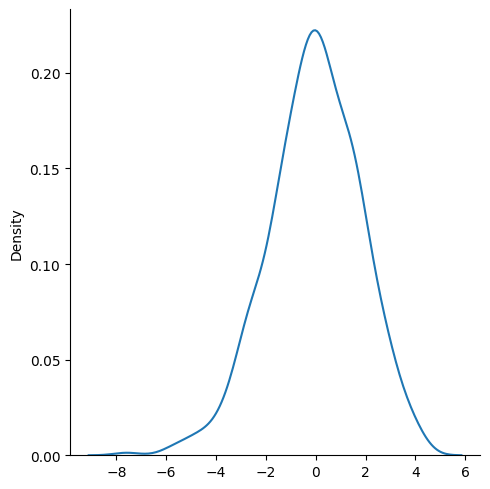

In [24]:
import seaborn as sns

sns.displot(x_pred-y_test , kind='kde')

In [25]:
from sklearn.metrics import r2_score

score = r2_score(x_pred , y_test)

In [26]:
score

0.3239820881698552

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [28]:
RidgeRegression = Ridge()

RidgeRegression

Ridge()

In [29]:
paremetres ={'alpha' : [1,2,3,4,5,6,7,10,25,50,90]}

RidgeCv = GridSearchCV(RidgeRegression , paremetres , scoring='neg_mean_squared_error' , cv=5)

RidgeCv.fit(X_train , y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 10, 25, 50, 90]},
             scoring='neg_mean_squared_error')

In [30]:
print(RidgeCv.best_params_)

{'alpha': 90}


In [31]:
print(RidgeCv.best_score_)

-3.694417998223204


In [32]:
x_pred = RidgeCv.predict(X_test)

In [33]:
x_pred

array([ 7.8465656 ,  6.0977728 ,  4.97327002,  5.1799288 ,  3.35667239,
        3.56688251,  4.07487708,  1.74369431,  5.01118781,  2.181486  ,
        1.05761608,  7.09994109,  4.41404918, -0.13747356,  2.52219092,
        0.62501248,  5.06740306,  5.61194797,  8.0125767 ,  8.95765272,
        5.6432937 ,  3.30729785,  4.28837351,  6.73203285,  3.89429965,
        6.68720073,  4.54240781,  5.63208264,  4.43178757,  3.55978969,
        2.79995111,  6.36544644, -0.5297885 ,  1.91307756,  5.2531908 ,
        4.36580598,  6.46870732,  3.33523473,  6.07082157,  5.907966  ,
        7.1071006 ,  5.2528234 ,  3.46141753,  4.7703766 ,  3.77449006,
        3.04395485,  3.28099603,  1.46883213,  4.45005824,  4.80815091,
        4.05767214,  3.93709616,  8.59535151,  4.17941096,  6.06275451,
        1.9684463 ,  4.915377  ,  0.51019482,  2.1863759 ,  1.82841694,
        3.02983234,  3.80457123,  6.33359586,  1.36636299,  5.37238665,
        5.11384556,  6.10267519,  2.05188   ,  6.22439622,  7.56

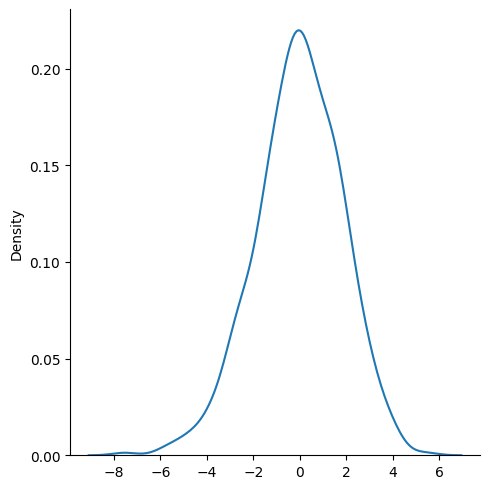

In [34]:
sns.displot(x_pred-y_test , kind='kde')

In [35]:
from sklearn.metrics import r2_score

scoring = r2_score(x_pred , y_test)

In [36]:
scoring

0.30833847450653606

Lasso Implampiation

In [37]:
from sklearn.linear_model import Lasso

In [38]:
Lasso = Lasso()
Lasso

Lasso()

In [39]:
paremetres ={'alpha' : [1,2,3,4,5,6,7,10,25,50,90]}

Lassocv = GridSearchCV(Lasso , paremetres , scoring='neg_mean_squared_error' , cv=5)

Lassocv.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 10, 25, 50, 90]},
             scoring='neg_mean_squared_error')

In [40]:
print(Lassocv.best_params_)

{'alpha': 1}


In [41]:
print(Lassocv.best_score_)

-4.648531782665204


In [46]:
perid_lass = Lassocv.predict(X_test)

In [47]:
perid_lass

array([6.75343581, 4.62493832, 4.96142444, 4.5130078 , 3.64746011,
       4.1604977 , 3.87316663, 2.27780697, 5.02413669, 1.32517751,
       2.24453968, 6.99924159, 5.5318382 , 1.89430794, 3.28825687,
       0.93961105, 4.77355123, 5.81262923, 7.01124338, 7.43662667,
       3.69162992, 3.18159685, 3.86397552, 6.70162562, 4.3191214 ,
       4.5324036 , 4.16030389, 4.63249789, 5.15348419, 3.72359623,
       1.93575613, 5.93698406, 2.62767386, 1.97701576, 5.45446642,
       5.11353181, 6.12485348, 3.72567221, 6.78177063, 4.72725213,
       6.34681778, 4.05803205, 3.57264114, 4.25973547, 2.8097722 ,
       4.11579139, 3.55069928, 2.29507563, 4.94662639, 5.0000502 ,
       4.46646741, 4.27649861, 5.91822641, 4.18773839, 5.59387954,
       3.08658947, 3.83686187, 1.41184647, 4.12208074, 2.54623431,
       2.75525043, 3.9758835 , 5.66298328, 1.742525  , 4.33290021,
       5.57025201, 6.28288036, 3.65918748, 6.46057579, 6.77875462,
       6.02882797, 6.5062791 , 5.24405764, 6.36842346, 6.80712

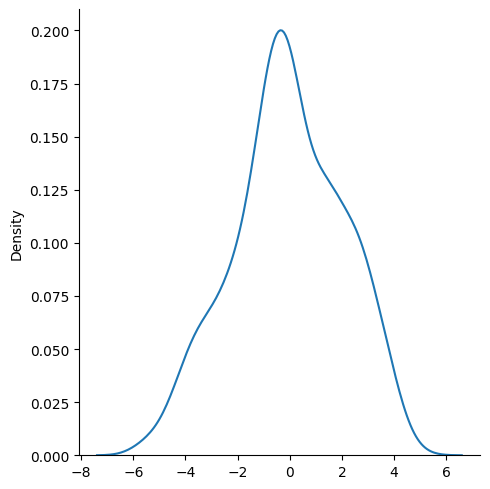

In [54]:
sns.displot(perid_lass-y_test , kind='kde')